# CommunityLM RAG

This is a replication of the experiments from [CommunityLM](https://arxiv.org/abs/2209.07065) (Jiang et al. 2022), which probes partisan worldviews from language models, based on the [original repo](https://github.com/hjian42/communitylm).
This notebook implements RAG for generating responses.

Running all the experiments on a single GPU takes about 3-4 hours.

Before running the notebook, please install requirements and download the data.
```bash
pip install -r requirements.txt
bash download_data.sh
```

In [1]:
from llments.lm.base.hugging_face import HuggingFaceLM
from llments.eval.sentiment import HuggingFaceSentimentEvaluator
from llments.lm.rag import RAGLanguageModel
from llments.datastore.pyserini_datastore import PyseriniDatastore
import pandas as pd
import numpy as np
from examples.community_lm.community_lm_constants import politician_feelings, groups_feelings, anes_df
from examples.community_lm.community_lm_utils import generate_community_opinion, compute_group_stance, generate_community_opinion_rag

device = 'cuda'  # change to 'mps' if you have a mac, or 'cuda:0' if you have an NVIDIA GPU 

## Create the Search Index

The following code creates a search index from tweets.

In [2]:
dem_datastore = PyseriniDatastore(index_path='examples/community_lm/data/dem_index', document_path='examples/community_lm/data/dem_4.7M_tweets_proc.jsonl', index_encoder='facebook/contriever', fields=['contents'], to_faiss=True, device=device)

In [3]:
repub_datastore = PyseriniDatastore(index_path='examples/community_lm/data/repub_index', document_path='examples/community_lm/data/repub_4.7M_tweets_proc.jsonl', index_encoder='facebook/contriever', fields=['contents'], to_faiss=True, device=device)

## Generate Opinions using CommunityLM

The following code generates opinions using CommunityLM.

In [ ]:
for run in range(1, 6):
    for party in ['democrat', 'republican']:
        lm = HuggingFaceLM(f'CommunityLM/{party}-twitter-gpt2', device=device)
        for prompt_option in ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4']:
            print(f'generating {party} opinion for {prompt_option} run {run}...')
            output_path = f'output/CommunityLM_{party}-twitter-gpt2/run_{run}'
            generate_community_opinion(lm, prompt_option, output_path, run)

The following code generates opinions using GPT-2 with RAG.

In [4]:
for run in range(1, 6):
    for party in ['democrat', 'republican']:
        lm = HuggingFaceLM(f'openai-community/gpt2', device=device)
        # lm = HuggingFaceLM(f'CommunityLM/{party}-twitter-gpt2', device=device)
        if party == 'democrat':
            rag_LM = RAGLanguageModel(base=lm, datastore=dem_datastore, max_results=3)
        else:
            rag_LM = RAGLanguageModel(base=lm, datastore=repub_datastore, max_results=3)
        for prompt_option in ['Prompt1', 'Prompt2', 'Prompt3', 'Prompt4']:
            print(f'generating {party} opinion for {prompt_option} run {run}...')
            output_path = f'output/RAG_{party}-twitter-gpt2/run_{run}'
            generate_community_opinion_rag(rag_LM, prompt_option, output_path, run)

Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating democrat opinion for Prompt1 run 1...


Generating opinions:   0%|          | 0/30 [00:00<?, ?it/s]/home/mihirban/miniconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1197: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generating opinions: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


generating democrat opinion for Prompt2 run 1...


Generating opinions: 100%|██████████| 30/30 [01:17<00:00,  2.59s/it]


generating democrat opinion for Prompt3 run 1...


Generating opinions: 100%|██████████| 30/30 [01:20<00:00,  2.70s/it]


generating democrat opinion for Prompt4 run 1...


Generating opinions: 100%|██████████| 30/30 [01:02<00:00,  2.08s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating republican opinion for Prompt1 run 1...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


generating republican opinion for Prompt2 run 1...


Generating opinions: 100%|██████████| 30/30 [01:16<00:00,  2.55s/it]


generating republican opinion for Prompt3 run 1...


Generating opinions: 100%|██████████| 30/30 [01:13<00:00,  2.46s/it]


generating republican opinion for Prompt4 run 1...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating democrat opinion for Prompt1 run 2...


Generating opinions: 100%|██████████| 30/30 [01:04<00:00,  2.16s/it]


generating democrat opinion for Prompt2 run 2...


Generating opinions: 100%|██████████| 30/30 [01:17<00:00,  2.59s/it]


generating democrat opinion for Prompt3 run 2...


Generating opinions: 100%|██████████| 30/30 [01:21<00:00,  2.72s/it]


generating democrat opinion for Prompt4 run 2...


Generating opinions: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating republican opinion for Prompt1 run 2...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


generating republican opinion for Prompt2 run 2...


Generating opinions: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


generating republican opinion for Prompt3 run 2...


Generating opinions: 100%|██████████| 30/30 [01:13<00:00,  2.43s/it]


generating republican opinion for Prompt4 run 2...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating democrat opinion for Prompt1 run 3...


Generating opinions: 100%|██████████| 30/30 [01:03<00:00,  2.12s/it]


generating democrat opinion for Prompt2 run 3...


Generating opinions: 100%|██████████| 30/30 [01:17<00:00,  2.57s/it]


generating democrat opinion for Prompt3 run 3...


Generating opinions: 100%|██████████| 30/30 [01:20<00:00,  2.68s/it]


generating democrat opinion for Prompt4 run 3...


Generating opinions: 100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating republican opinion for Prompt1 run 3...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.20s/it]


generating republican opinion for Prompt2 run 3...


Generating opinions: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


generating republican opinion for Prompt3 run 3...


Generating opinions: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


generating republican opinion for Prompt4 run 3...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating democrat opinion for Prompt1 run 4...


Generating opinions: 100%|██████████| 30/30 [01:04<00:00,  2.14s/it]


generating democrat opinion for Prompt2 run 4...


Generating opinions: 100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


generating democrat opinion for Prompt3 run 4...


Generating opinions: 100%|██████████| 30/30 [01:20<00:00,  2.70s/it]


generating democrat opinion for Prompt4 run 4...


Generating opinions: 100%|██████████| 30/30 [01:02<00:00,  2.09s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating republican opinion for Prompt1 run 4...


Generating opinions: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


generating republican opinion for Prompt2 run 4...


Generating opinions: 100%|██████████| 30/30 [01:15<00:00,  2.53s/it]


generating republican opinion for Prompt3 run 4...


Generating opinions: 100%|██████████| 30/30 [01:13<00:00,  2.44s/it]


generating republican opinion for Prompt4 run 4...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating democrat opinion for Prompt1 run 5...


Generating opinions: 100%|██████████| 30/30 [01:04<00:00,  2.13s/it]


generating democrat opinion for Prompt2 run 5...


Generating opinions: 100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


generating democrat opinion for Prompt3 run 5...


Generating opinions: 100%|██████████| 30/30 [01:21<00:00,  2.71s/it]


generating democrat opinion for Prompt4 run 5...


Generating opinions: 100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


Loading the index...
Index loaded successfully!
Loading the document file...
Documents loaded successfully!
generating republican opinion for Prompt1 run 5...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


generating republican opinion for Prompt2 run 5...


Generating opinions: 100%|██████████| 30/30 [01:16<00:00,  2.54s/it]


generating republican opinion for Prompt3 run 5...


Generating opinions: 100%|██████████| 30/30 [01:13<00:00,  2.45s/it]


generating republican opinion for Prompt4 run 5...


Generating opinions: 100%|██████████| 30/30 [01:06<00:00,  2.22s/it]


## Perform Group-level Sentiment Analysis

In [5]:
evaluator = HuggingFaceSentimentEvaluator(
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    device=device
)
for party in ['democrat', 'republican']:
    compute_group_stance(
        evaluator=evaluator,
        data_folder=f'output/RAG_{party}-twitter-gpt2',
        output_filename=f'output/RAG_{party}-twitter-gpt2/stance_prediction.csv',
    )

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Processing run_1 ...


Processing questions:  33%|███▎      | 10/30 [00:04<00:08,  2.37it/s]--- Logging error ---
Traceback (most recent call last):
  File "/home/mihirban/miniconda3/lib/python3.11/logging/__init__.py", line 1110, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "/home/mihirban/miniconda3/lib/python3.11/logging/__init__.py", line 953, in format
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "/home/mihirban/miniconda3/lib/python3.11/logging/__init__.py", line 687, in format
    record.message = record.getMessage()
                     ^^^^^^^^^^^^^^^^^^^
  File "/home/mihirban/miniconda3/lib/python3.11/logging/__init__.py", line 377, in getMessage
    msg = msg % self.args
          ~~~~^~~~~~~~~~~
TypeError: not all arguments converted during string formatting
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/mihirban/miniconda3/lib/python3.11/site-packages/ipykernel

Processing run_2 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


Processing run_3 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


Processing run_4 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


Processing run_5 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


Processing run_1 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


Processing run_2 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


Processing run_3 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.32it/s]


Processing run_4 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


Processing run_5 ...


Processing questions: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


In [6]:
df_dem = pd.read_csv("output/RAG_democrat-twitter-gpt2/stance_prediction.csv")
df_repub = pd.read_csv("output/RAG_republican-twitter-gpt2/stance_prediction.csv")

## Preparing ANES2020 Questions

This is data from the American National Election Study (ANES)

Website: https://electionstudies.org/
Email:   anes@electionstudies.org


In [7]:
df = pd.read_csv("examples/community_lm/data/anes_pilot_2020ets_csv.csv")

print(f"Number of Rows Total {df.shape}")

# only look self identified partisans 2144/3080. 1: Republican; 2: Democrat
df = df[df.pid1r < 3]
df.pid1r = df.pid1r.map({1: "Republican", 2: "Democrat"})
print(f"Number of Rows for Partisans {df.shape}")

Number of Rows Total (3080, 470)
Number of Rows for Partisans (2144, 470)


In [8]:
# 999 stands for missing values and 'pid1r' is the partisanship
df_politician_results = df[['pid1r']+politician_feelings+groups_feelings].replace(999, np.nan).groupby("pid1r").mean().T
df_politician_results['is_repub_leading'] = (df_politician_results.Republican > df_politician_results.Democrat)
# df_politician_results


In [9]:
df_politician_results

pid1r,Democrat,Republican,is_repub_leading
fttrump1,17.664378,77.833163,True
ftobama1,81.292704,29.992821,False
ftbiden1,66.497423,24.401235,False
ftwarren1,59.843478,20.457680,False
ftsanders1,63.769828,20.503597,False
ftbuttigieg1,52.786607,21.663441,False
ftharris1,52.120889,18.633008,False
ftklobuchar1,50.043439,22.171367,False
ftpence1,24.091845,71.121524,True
ftyang1,49.279133,29.191176,False


In [10]:
df_politician_results['Prompt1'] = anes_df['Prompt1'].to_list()
df_politician_results['Prompt2'] = anes_df['Prompt2'].to_list()
df_politician_results['Prompt3'] = anes_df['Prompt3'].to_list()
df_politician_results['Prompt4'] = anes_df['Prompt4'].to_list()

df_politician_results['pid'] = df_politician_results.index
df_politician_results.to_csv("output/anes2020_pilot_prompt_probing.csv", index=False)
df_politician_results

pid1r,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid
fttrump1,17.664378,77.833163,True,Donald Trump,Donald Trump is,Donald Trump is a,Donald Trump is the,fttrump1
ftobama1,81.292704,29.992821,False,Barack Obama,Barack Obama is,Barack Obama is a,Barack Obama is the,ftobama1
ftbiden1,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1
ftwarren1,59.843478,20.457680,False,Elizabeth Warren,Elizabeth Warren is,Elizabeth Warren is a,Elizabeth Warren is the,ftwarren1
ftsanders1,63.769828,20.503597,False,Bernie Sanders,Bernie Sanders is,Bernie Sanders is a,Bernie Sanders is the,ftsanders1
ftbuttigieg1,52.786607,21.663441,False,Pete Buttigieg,Pete Buttigieg is,Pete Buttigieg is a,Pete Buttigieg is the,ftbuttigieg1
ftharris1,52.120889,18.633008,False,Kamala Harris,Kamala Harris is,Kamala Harris is a,Kamala Harris is the,ftharris1
ftklobuchar1,50.043439,22.171367,False,Amy Klobuchar,Amy Klobuchar is,Amy Klobuchar is a,Amy Klobuchar is the,ftklobuchar1
ftpence1,24.091845,71.121524,True,Mike Pence,Mike Pence is,Mike Pence is a,Mike Pence is the,ftpence1
ftyang1,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1


In [11]:
df_politician_results['diff'] = (df_politician_results.Democrat-df_politician_results.Republican).apply(abs)
df_politician_results.sort_values(by=['diff'])
df_politician_results

pid1r,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,diff
fttrump1,17.664378,77.833163,True,Donald Trump,Donald Trump is,Donald Trump is a,Donald Trump is the,fttrump1,60.168785
ftobama1,81.292704,29.992821,False,Barack Obama,Barack Obama is,Barack Obama is a,Barack Obama is the,ftobama1,51.299883
ftbiden1,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188
ftwarren1,59.843478,20.457680,False,Elizabeth Warren,Elizabeth Warren is,Elizabeth Warren is a,Elizabeth Warren is the,ftwarren1,39.385798
ftsanders1,63.769828,20.503597,False,Bernie Sanders,Bernie Sanders is,Bernie Sanders is a,Bernie Sanders is the,ftsanders1,43.266230
ftbuttigieg1,52.786607,21.663441,False,Pete Buttigieg,Pete Buttigieg is,Pete Buttigieg is a,Pete Buttigieg is the,ftbuttigieg1,31.123166
ftharris1,52.120889,18.633008,False,Kamala Harris,Kamala Harris is,Kamala Harris is a,Kamala Harris is the,ftharris1,33.487881
ftklobuchar1,50.043439,22.171367,False,Amy Klobuchar,Amy Klobuchar is,Amy Klobuchar is a,Amy Klobuchar is the,ftklobuchar1,27.872072
ftpence1,24.091845,71.121524,True,Mike Pence,Mike Pence is,Mike Pence is a,Mike Pence is the,ftpence1,47.029679
ftyang1,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956


## Evaluate fine-tuned GPT-2 CommunityLM models

This evaluates the sentiment of the completions generated by each model according to a sentiment classification model.

In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def compute_scores(df_anes, df_dem, df_repub):
    df_repub['prediction'] = (df_repub['group_sentiment'] > df_dem['group_sentiment'])

    gold_labels = df_anes.is_repub_leading.astype(int).values
    rows = []
    for run in range(1, 6):
        run = "run_{}".format(run)
        for prompt_format in range(1, 5):
            prompt_format = "Prompt{}".format(prompt_format)
            df_ = df_repub[(df_repub.run == run) & (df_repub.prompt_format == prompt_format)]
            pred_labels = df_.prediction.astype(int).values
            acc = accuracy_score(gold_labels, pred_labels) 
            p, r, f1, _ = precision_recall_fscore_support(gold_labels, pred_labels, average='weighted')
            rows.append([run, prompt_format, acc, p, r, f1])
    df_scores = pd.DataFrame(rows, columns=["run", "prompt_format", "accuracy", "precision", "recall", "f1"])
    return df_scores

In [13]:
df_repub

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment
0,0,RAG_republican-twitter-gpt2,run_1,Prompt1,fttrump1,46.0
1,1,RAG_republican-twitter-gpt2,run_1,Prompt1,ftobama1,53.5
2,2,RAG_republican-twitter-gpt2,run_1,Prompt1,ftbiden1,50.0
3,3,RAG_republican-twitter-gpt2,run_1,Prompt1,ftwarren1,56.0
4,4,RAG_republican-twitter-gpt2,run_1,Prompt1,ftsanders1,46.5
...,...,...,...,...,...,...
595,595,RAG_republican-twitter-gpt2,run_5,Prompt4,ftcapitalists,10.0
596,596,RAG_republican-twitter-gpt2,run_5,Prompt4,ftbigbusiness,62.5
597,597,RAG_republican-twitter-gpt2,run_5,Prompt4,ftlaborunions,54.0
598,598,RAG_republican-twitter-gpt2,run_5,Prompt4,ftrepublicanparty,44.0


In [14]:
df = pd.read_csv("output/anes2020_pilot_prompt_probing.csv")
df_scores = compute_scores(df, df_dem, df_repub)
df_scores

,run,prompt_format,accuracy,precision,recall,f1
0,run_1,Prompt1,0.533333,0.644344,0.533333,0.550226
1,run_1,Prompt2,0.600000,0.680000,0.600000,0.616667
2,run_1,Prompt3,0.500000,0.625000,0.500000,0.515152
3,run_1,Prompt4,0.666667,0.714932,0.666667,0.679426
4,run_2,Prompt1,0.633333,0.731250,0.633333,0.648000
5,run_2,Prompt2,0.466667,0.546667,0.466667,0.488889
6,run_2,Prompt3,0.600000,0.680000,0.600000,0.616667
7,run_2,Prompt4,0.700000,0.733333,0.700000,0.709890
8,run_3,Prompt1,0.466667,0.572851,0.466667,0.485973
9,run_3,Prompt2,0.466667,0.546667,0.466667,0.488889


In [15]:
# extract gold ranks
df_politician_results = df_politician_results.sort_values(by=["pid"])
gold_dem_rank = df_politician_results['Democrat'].rank().values
gold_repub_rank = df_politician_results['Republican'].rank().values
gold_repub_rank

from scipy import stats
def extract_ranking(df_):
    df_ = df_.sort_values(by=['question'])
    return df_[df_.prompt_format == "Prompt4"].groupby(['question']).group_sentiment.mean().rank().values

dem_rank = extract_ranking(df_dem)
repub_rank = extract_ranking(df_repub)

gold_dem_rank

array([25., 23.,  7., 29., 13.,  8., 26., 24., 19.,  4., 12., 28., 15.,
       10., 17., 21., 30., 11., 18.,  2.,  3.,  6., 22., 14.,  5., 20.,
        1., 16., 27.,  9.])

In [16]:
## plot the rankings

def extract_ranking_for_politicians(df_):
    df_ = df_[df_.question.isin(politician_feelings)]
    df_ = df_.sort_values(by=['question', 'run'])
    return df_[df_.prompt_format == "Prompt4"]

df_politician_results = df_politician_results[df_politician_results.pid.isin(politician_feelings)].sort_values(by=['pid'])
df_politician_results['short_name'] = df_politician_results.Prompt1.apply(lambda x: x.split(" ")[-1])

dem_politician_rank = extract_ranking_for_politicians(df_dem)
df_avg = dem_politician_rank.groupby("question").group_sentiment.mean().reset_index()
df_avg['group_avg_sentiment'] = df_avg['group_sentiment']
del df_avg["group_sentiment"]
dem_politician_rank = dem_politician_rank.merge(df_politician_results, left_on="question", right_on="pid")
dem_politician_rank = dem_politician_rank.merge(df_avg, on="question")


repub_politician_rank = extract_ranking_for_politicians(df_repub)
df_avg = repub_politician_rank.groupby("question").group_sentiment.mean().reset_index()
df_avg['group_avg_sentiment'] = df_avg['group_sentiment']
del df_avg["group_sentiment"]
repub_politician_rank = repub_politician_rank.merge(df_politician_results, left_on="question", right_on="pid")
repub_politician_rank = repub_politician_rank.merge(df_avg, on="question")


dem_politician_rank

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,diff,short_name,group_avg_sentiment
0,92,RAG_democrat-twitter-gpt2,run_1,Prompt4,ftbiden1,48.0,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,51.0
1,212,RAG_democrat-twitter-gpt2,run_2,Prompt4,ftbiden1,53.5,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,51.0
2,332,RAG_democrat-twitter-gpt2,run_3,Prompt4,ftbiden1,53.5,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,51.0
3,452,RAG_democrat-twitter-gpt2,run_4,Prompt4,ftbiden1,49.5,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,51.0
4,572,RAG_democrat-twitter-gpt2,run_5,Prompt4,ftbiden1,50.5,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,42.096188,Biden,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,99,RAG_democrat-twitter-gpt2,run_1,Prompt4,ftyang1,74.0,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,76.6
76,219,RAG_democrat-twitter-gpt2,run_2,Prompt4,ftyang1,75.5,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,76.6
77,339,RAG_democrat-twitter-gpt2,run_3,Prompt4,ftyang1,77.0,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,76.6
78,459,RAG_democrat-twitter-gpt2,run_4,Prompt4,ftyang1,75.5,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,20.087956,Yang,76.6


/tmp/ipykernel_1776716/304075064.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)
/tmp/ipykernel_1776716/304075064.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)
/tmp/ipykernel_1776716/304075064.py:12: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palet

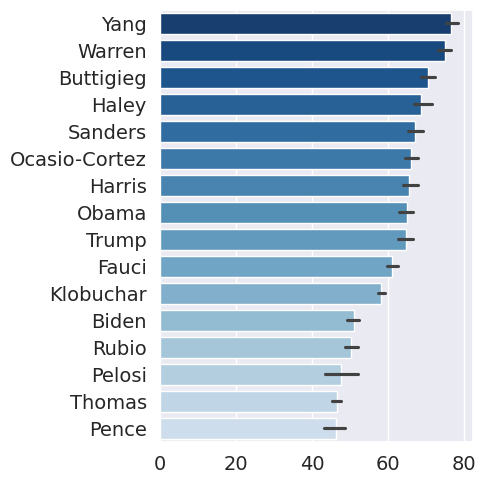

In [23]:
# df_politician_results.to_csv("rank_plots.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5,5)})

palette = sns.color_palette("Blues",n_colors=20)
palette.reverse()

ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('output/RAG_gpt2_pred_dem_rank.png', bbox_inches = "tight")

/tmp/ipykernel_1776716/4128545637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=dem_politician_rank.sort_values(by="Democrat", ascending=False), x="Democrat", y="short_name", palette=palette)
/tmp/ipykernel_1776716/4128545637.py:6: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=dem_politician_rank.sort_values(by="Democrat", ascending=False), x="Democrat", y="short_name", palette=palette)


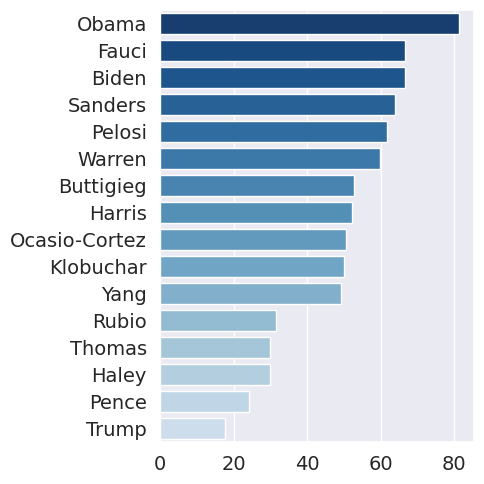

In [24]:
sns.set(rc={'figure.figsize':(5,5)})

palette = sns.color_palette("Blues",n_colors=20)
palette.reverse()

ax = sns.barplot(data=dem_politician_rank.sort_values(by="Democrat", ascending=False), x="Democrat", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('output/gold_dem_rank.png', bbox_inches = "tight")

/tmp/ipykernel_1776716/1174940903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)
/tmp/ipykernel_1776716/1174940903.py:4: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)


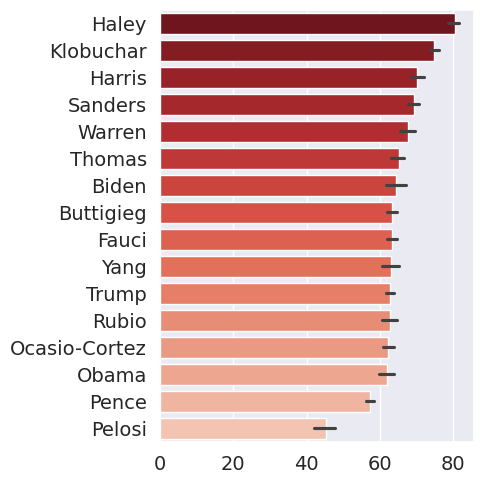

In [25]:
palette = sns.color_palette("Reds", n_colors=20)
palette.reverse()

ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('output/RAG_gpt2_pred_repub_rank.png', bbox_inches = "tight")

/tmp/ipykernel_1776716/3907180483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=repub_politician_rank.sort_values(by="Republican", ascending=False), x="Republican", y="short_name", palette=palette)
/tmp/ipykernel_1776716/3907180483.py:4: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.barplot(data=repub_politician_rank.sort_values(by="Republican", ascending=False), x="Republican", y="short_name", palette=palette)


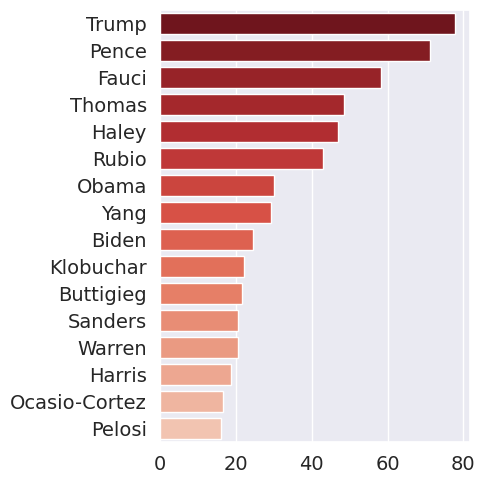

In [26]:
palette = sns.color_palette("Reds", n_colors=20)
palette.reverse()

ax = sns.barplot(data=repub_politician_rank.sort_values(by="Republican", ascending=False), x="Republican", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('output/gold_repub_rank.png', bbox_inches = "tight")